In [3]:
import tensorflow as tf
from datasets import load_dataset

In [4]:
ds = load_dataset("mnist")

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
# Preprocess the dataset
def preprocess(example):
    image = tf.cast(example['image'], tf.float32) / 255.0
    label = tf.cast(example['label'], tf.int32)
    return {"image": image, "label": label}

ds = ds.map(preprocess)

In [21]:
ds_train = ds["train"].to_tf_dataset(
    columns="image",
    label_cols="label",
    batch_size=128,
    shuffle=True
    )

ds_test = ds["test"].to_tf_dataset(
    columns="image",
    label_cols="label",
    batch_size=128,
)

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6


2024-02-23 10:04:48.604925: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6e7873bce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-23 10:04:48.604945: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2024-02-23 10:04:48.716989: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-23 10:04:48.899081: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8800
I0000 00:00:1708679088.962919 2275825 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 16s 30ms/step - loss: 0.3527 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.1842 - val_sparse_categorical_accuracy: 0.9470
Epoch 2/6
469/469 [==============================] - 13s 27ms/step - loss: 0.1621 - sparse_categorical_accuracy: 0.9536 - val_loss: 0.1341 - val_sparse_categorical_accuracy: 0.9619
Epoch 3/6
469/469 [==============================] - 13s 27ms/step - loss: 0.1179 - sparse_categorical_accuracy: 0.9654 - val_loss: 0.1080 - val_sparse_categorical_accuracy: 0.9686
Epoch 4/6
469/469 [==============================] - 13s 27ms/step - loss: 0.0910 - sparse_categorical_accuracy: 0.9738 - val_loss: 0.0941 - val_sparse_categorical_accuracy: 0.9723
Epoch 5/6
469/469 [==============================] - 12s 27ms/step - loss: 0.0737 - sparse_categorical_accuracy: 0.9787 - val_loss: 0.0912 - val_sparse_categorical_accuracy: 0.9727
Epoch 6/6
469/469 [==============================] - 13s 27ms/step - loss: 0.0602 - sparse_categorical_ac

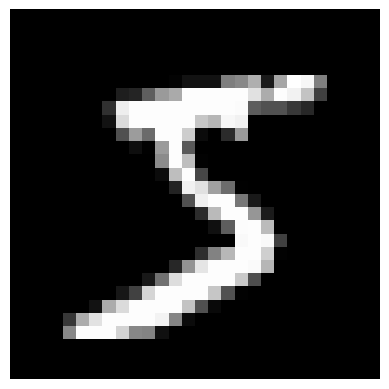

In [31]:
import matplotlib.pyplot as plt

image = ds["train"][0]["image"]
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
model.predict(tf.expand_dims(ds["train"][0]["image"], axis=0))

1/1 [==============================] - 0s 31ms/step


array([[ -6.9581347,  -6.585747 ,  -0.906853 ,   8.90089  , -15.660425 ,
         13.717833 ,  -9.954727 ,  -1.1247139,  -5.2108326,  -4.4313374]],
      dtype=float32)